### ----------------------------Regression------------------------------


### simple linear regression model, predict house price from no of rooms


In [1]:
path = "boston.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
boston_df = pd.read_csv(path)
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [9]:
boston_df.shape

(506, 14)

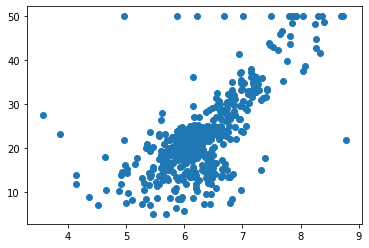

In [20]:
plt.scatter(boston_df.RM,boston_df.MEDV)

In [4]:
#CRIM = Ciminal rate
#NX = nitric oxide concentration
#RM = average no of rooms
#MEDV = median value of owner occupied homes in thousands of dollars

In [5]:
X = boston_df.drop('MEDV',axis=1).values   #drops target column, axis =1 mean by column, axis=0 means by row
y = boston_df['MEDV'].values  # values to return numpy array

In [7]:
X.shape

(506, 13)

In [10]:
X_rooms = X[:,5]

### reshaping of numpy as linear model requires X in form[n_row,n_features]


In [11]:
print(X_rooms.shape)
X_rooms = X_rooms.reshape(-1,1)
print(X_rooms.shape)

(506,)
(506, 1)


In [12]:
print(y.shape)
y = y.reshape(-1,1)
print(y.shape)

(506,)
(506, 1)


### Using Linear Regression

In [13]:
linreg = linear_model.LinearRegression()   #instantiate linear regression

linreg.fit(X_rooms,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Linear regression coefficients
### y= mx + c

In [14]:
print(linreg.intercept_)  # intercept i.e c
print(linreg.coef_) #slope i.e m

[-34.67062078]
[[9.10210898]]


### example predict y if x is 1


In [16]:
my_pred1 = linreg.coef_*1 +linreg.intercept_ 
print(my_pred1)
#-----------------------------------------------------------
my_pred2= linreg.predict([[1]])
print(my_pred2)
print(my_pred1 == my_pred2)

[[-25.5685118]]
[[-25.5685118]]
[[ True]]


### example predict y if x is 2


In [22]:
pred1 = linreg.coef_*2 +linreg.intercept_ 
print(pred1)
pred2= linreg.predict([[2]])

print(pred2)
print(pred2 == pred1)

[[-16.46640281]]
[[-16.46640281]]
[[ True]]


In [25]:
np.abs(linreg.predict([[2]])-linreg.predict([[1]]))

array([[9.10210898]])

### --------Linear regression coefficients--------


### ----------Visualise Model-----------


In [23]:
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)
y_pred = linreg.predict(prediction_space)  #predict price for a range of nomber of rooms

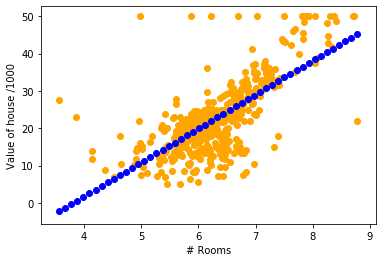

In [26]:
plt.scatter(X_rooms,y, color='orange')
plt.scatter(prediction_space,y_pred,color='blue')
plt.xlabel("# Rooms")
plt.ylabel("Value of house /1000")
plt.show()

### simple linear regression by splitting data and mean squared error


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [28]:
iris = load_iris() 
X = iris['data'][:,0]+iris['data'][:,1]+iris['data'][:,2]+iris['data'][:,3]
y = iris['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=28,stratify=y)
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
y_pred = reg.predict(X_test)

R2 = r2_score(y_test, y_pred)

In [40]:
y_pred

array([[-0.00607577],
       [-0.07892954],
       [ 1.01387691],
       [ 0.40676222],
       [-0.07892954],
       [ 1.6209916 ],
       [ 2.05811418],
       [ 0.94102314],
       [ 1.18386902],
       [ 1.6209916 ],
       [-0.05464495],
       [ 1.91240665],
       [ 1.20815361],
       [ 0.21248552],
       [ 1.30529196],
       [ 1.71812995],
       [ 1.71812995],
       [ 0.35819304],
       [ 0.4310468 ],
       [ 1.06244608],
       [ 0.69817727],
       [ 0.11534716],
       [ 1.03816149],
       [ 1.47528407],
       [ 0.28533928],
       [ 1.37814572],
       [-0.20035247],
       [ 0.47961598],
       [ 1.96097583],
       [ 2.37381381],
       [ 0.13963175],
       [ 1.11101526],
       [ 0.2367701 ],
       [ 1.74241454],
       [ 0.11534716],
       [ 0.2367701 ],
       [ 1.40243031],
       [-0.10321412],
       [ 1.32957655],
       [ 2.5923751 ],
       [ 1.45099948],
       [ 1.88812206],
       [ 1.8152683 ],
       [ 1.37814572],
       [ 2.05811418]])

In [35]:
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(R2,rmse)


0.8338668404994071 0.3327993985377106


### storing the intercept ,coefficients into dict  
### and dumping that dict into a json file   

In [38]:
import json
params = {'coefficient':reg.coef_[0][0],'intercept':reg.intercept_[0]}
path = 'boston_param.json'
with open(path,'w') as file:
    file.write(json.dumps(params))

### More on R2


In [41]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(r2_score(y_true, y_pred) ) 

y_true = [1,2,3]
y_pred = [1,2,3]
print(r2_score(y_true, y_pred))

y_true = [1,2,3]
y_pred = [2,2,2]
print(r2_score(y_true, y_pred))

y_true = [1,2,3]
y_pred = [3,2,1]
print(r2_score(y_true, y_pred))


0.9486081370449679
1.0
0.0
-3.0
